In [1]:
%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import os
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('fig_publication.mplstyle')
%config InlineBackend.figure_format = 'retina'

# Load fakes (sims) DF and DR4 DF

In [2]:
fakes_df = pd.read_csv("./dataframes/orig_fakes_df.csv.gzip", compression='gzip', index_col=0)
dr4_df = pd.read_csv("./dataframes/orig_dr4_df.csv.gzip", compression='gzip', index_col=0)

In [3]:
fakes_df

,amplitude_magn_g,anderson_darling_normal_magn_g,beyond_1_std_magn_g,beyond_2_std_magn_g,cusum_magn_g,inter_percentile_range_2_magn_g,inter_percentile_range_10_magn_g,inter_percentile_range_25_magn_g,kurtosis_magn_g,linear_fit_slope_magn_g,...,standard_deviation_magn_r,stetson_K_magn_r,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,skew_flux_r,stetson_K_flux_r
sid,,,,,,,,,,,,,,,,,,,,,
6417979422,1.925718,1.752840,0.408163,0.0,0.425961,3.716248,3.240535,1.999153,-1.147905,0.019292,...,1.124392,0.929654,18.555391,11.669273,0.424440,0.915662,-0.432657,0.958406,0.998215,0.773014
6439074373,2.313271,6.242598,0.544218,0.0,0.458069,4.586686,4.375262,3.713085,-1.596927,0.005899,...,1.631735,0.946339,17.689695,15.523734,0.437505,1.315818,-0.902408,1.148051,0.874291,0.773280
9020928999,2.027956,6.452107,0.429448,0.0,0.444023,3.941975,3.314264,2.360711,-1.283150,0.020341,...,1.056116,0.922816,17.861500,11.056737,0.425569,0.794369,-0.423881,0.892017,0.947871,0.790745
604029941,2.164002,2.823114,0.424528,0.0,0.429195,4.264567,3.573986,2.523350,-1.250747,0.013158,...,1.222392,0.950357,17.867418,10.617710,0.436003,1.027209,-0.894394,1.014422,0.899074,0.741584
4229763628,2.439133,3.030501,0.386555,0.0,0.448217,4.545591,3.327130,2.430038,-1.277114,0.020108,...,1.403626,0.934688,16.848856,11.799259,0.457372,0.944930,-1.367946,0.972413,0.601326,0.789646
6011793767,2.428476,16.336357,0.472656,0.0,0.448958,4.651444,4.122466,3.430849,-1.429027,0.007894,...,1.330221,0.909978,17.374739,24.971611,0.458264,0.785898,-1.554181,0.888269,0.386377,0.835887
6031286883,2.260002,6.587531,0.496503,0.0,0.449040,4.501166,4.036433,3.082117,-1.428517,0.015139,...,1.292708,0.919051,17.772713,11.349049,0.456618,0.721447,-1.440829,0.850721,0.452070,0.818922


In [4]:
dr4_df

,amplitude_magn_g,anderson_darling_normal_magn_g,beyond_1_std_magn_g,beyond_2_std_magn_g,cusum_magn_g,inter_percentile_range_2_magn_g,inter_percentile_range_10_magn_g,inter_percentile_range_25_magn_g,kurtosis_magn_g,linear_fit_slope_magn_g,...,standard_deviation_magn_r,stetson_K_magn_r,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,skew_flux_r,stetson_K_flux_r
sid,,,,,,,,,,,,,,,,,,,,,
245101100000933,0.177000,3.696596,0.370000,0.030000,0.158870,0.341499,0.286501,0.158501,-0.787381,-0.000212,...,0.097860,0.851286,15.842624,2.711263,0.099072,0.007498,-0.944294,0.087656,-0.507748,0.844530
245101100009703,0.293500,2.724011,0.290000,0.060000,0.184453,0.523001,0.333000,0.104000,0.201318,-0.001444,...,0.130134,0.869721,15.653200,4.130320,0.156431,0.013800,-1.050300,0.118238,-0.059173,0.909857
245101100010242,0.328500,5.493390,0.190000,0.050000,0.229448,0.559999,0.220499,0.094999,5.286414,-0.001808,...,0.068449,0.672620,16.533829,4.853297,0.187999,0.004273,8.948397,0.067449,2.465220,0.683464
245104200000799,0.329500,2.502895,0.467290,0.000000,0.089224,0.593760,0.490400,0.350000,-1.362500,0.000242,...,0.123850,0.858237,17.937359,1.524028,0.131790,0.011540,-0.980239,0.112776,-0.026306,0.870056
245104200000939,2.293000,12.605539,0.066038,0.056604,0.177457,4.114202,1.156300,0.426999,9.274009,-0.003301,...,0.394907,0.789900,15.854793,1.492581,0.322914,0.081920,0.337605,0.286570,0.109400,0.675794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597113100010642,0.483999,1.274301,0.293578,0.055046,0.187018,0.595680,0.369799,0.157999,1.613005,-0.001550,...,0.107312,0.680863,18.940697,5.417244,0.233112,0.008082,5.852146,0.105139,1.738649,0.670839
1597113100019088,0.323501,1.453954,0.271186,0.076271,0.202899,0.490780,0.252100,0.097000,1.162233,-0.001054,...,0.079516,0.702109,17.359133,3.377403,0.154508,0.005559,5.974216,0.076836,1.682657,0.710270
1597113100031221,0.074500,0.266636,0.307692,0.025641,0.153808,0.093640,0.060800,0.032499,1.197538,-0.000101,...,0.031295,0.753234,13.399863,0.861085,0.155385,0.000762,1.899416,0.029034,0.619902,0.756356


# PCA 

In [5]:
def applypca(dataset_real, dataset_fakes, pca_num):
    X_real = dataset_real
    X_fakes = dataset_fakes
    
    ss = StandardScaler()
    scaled_X_real = ss.fit_transform(X_real)
    pca = PCA(pca_num)
    
    # apply same PCA to both real and fakes data
    pcs_X_real = pca.fit_transform(scaled_X_real)
    pcs_X_fakes = pca.transform(ss.transform(X_fakes))
    
    score = pcs_X_real[:,0:2]
    coeff = np.transpose(pca.components_[0:2, :])
    
    return pca, pcs_X_real, pcs_X_fakes, score, coeff

In [6]:
def pcaplot(score, coeff, datacolor):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=datacolor, s=6, alpha=0.6) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width= .003, color = 'r',alpha = 0.5)
        fakes_df_cols_latex_read = [r.replace('_', '\_') for r in fakes_df.columns.values]
        plt.text(coeff[i,0]* 1.12, coeff[i,1] * 1.12, list(fakes_df_cols_latex_read)[i], 
                     color = 'darkblue', ha = 'center', va = 'center', fontsize = 10)

In [7]:
pca, pcs_X_real, pcs_X_fakes, score, coeff = applypca(dataset_real=dr4_df, 
                                                      dataset_fakes=fakes_df, 
                                                      pca_num=15)

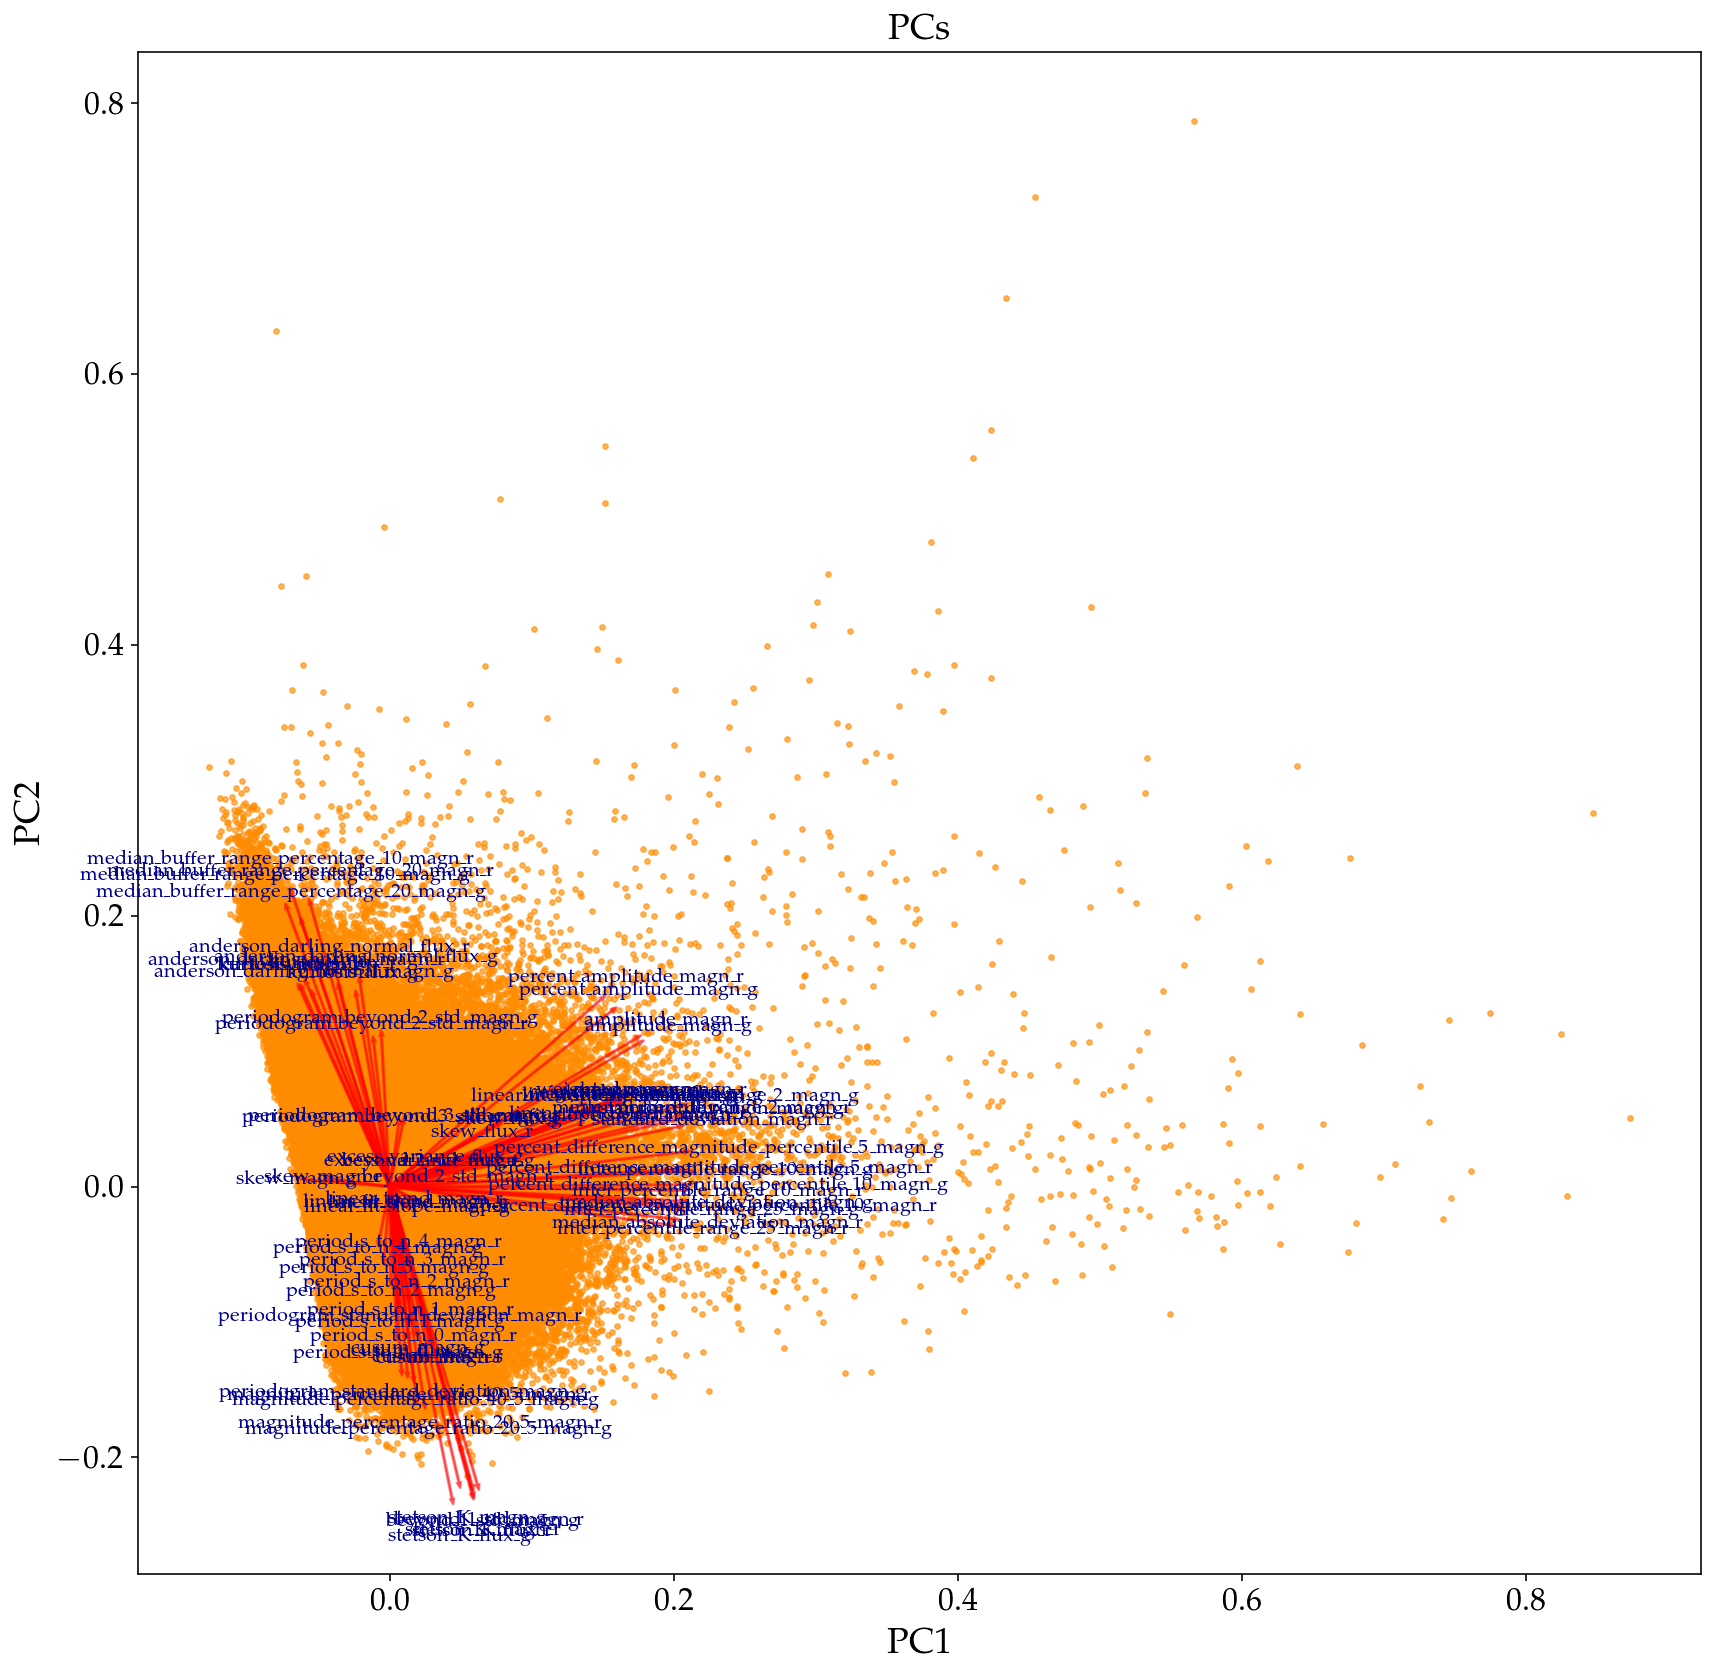

In [8]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCs")

pcaplot(pcs_X_real[:,0:2], np.transpose(pca.components_[0:2, :]), 'darkorange') 
plt.savefig('./figures/pca_overlay_data.png', dpi=300, bbox_inches='tight')

# Build DFs from first (15) PCs

In [9]:
pcs_X_fakes_df = pd.DataFrame(data=pcs_X_fakes, index=fakes_df.index)
pcs_X_fakes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sid,,,,,,,,,,,,,,,
6417979422,68.320153,-3.245662,18.148939,20.594229,-55.658226,-9.813647,-85.370797,-5.718446,13.445525,-3.217756,-12.829190,-0.353685,-0.696928,-13.125082,-9.607004
6439074373,93.032886,-3.357458,7.582035,36.872809,-14.574088,-6.120164,-16.225387,8.751485,8.868513,-12.300088,-8.485610,-5.820211,-2.674127,-15.886992,2.023145
9020928999,67.895401,-2.313617,15.033868,21.701524,-41.698952,-8.470361,-64.200816,-1.830232,10.747372,-4.444497,-11.551970,1.873989,0.448813,-14.082333,-4.391373
604029941,68.327337,-2.135591,13.458732,23.728215,-38.795608,-6.501566,-58.660546,-0.774375,12.961271,-3.922630,-8.716393,-3.367088,-3.059899,-8.251458,-4.877185
4229763628,80.824635,-3.555305,21.322197,26.570239,-53.860848,-10.805207,-75.066625,-0.726046,13.892452,-7.083509,-10.267617,-2.830083,-3.165062,-14.589188,-1.794690
6011793767,74.036038,-6.571253,18.709935,29.178633,-29.231547,-3.201588,-39.257492,2.347697,10.971331,-8.587772,-5.124227,-5.713363,-3.591917,-8.029214,-1.623052
6031286883,78.632268,-4.419617,17.132181,26.513687,-45.391577,-7.832855,-62.502065,0.199190,9.862187,-7.370195,-12.276823,-0.286546,0.164746,-10.143649,0.100789


In [10]:
pcs_X_real_df = pd.DataFrame(data=pcs_X_real, index=dr4_df.index)
pcs_X_real_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sid,,,,,,,,,,,,,,,
245101100000933,1.848374,-4.414711,-5.619392,5.259964,-0.999782,1.886475,2.325187,0.254462,-0.613783,-0.506667,-1.363090,-0.385465,0.583628,-0.451355,-1.989892
245101100009703,2.967064,-1.671175,-6.837336,3.595918,4.496346,0.035569,7.659103,0.350246,1.741859,-1.396336,0.549069,-1.516330,-0.009901,-4.071660,-2.128200
245101100010242,-0.108842,2.405274,-5.404212,0.148657,7.597082,0.413356,4.990347,0.843930,0.303865,-0.536131,-1.213950,-0.686024,-0.254137,-2.267715,-0.911700
245104200000799,7.365672,-5.579897,-5.080349,6.771768,0.701672,4.046233,2.639456,-1.075756,-2.851525,-0.917583,-1.643629,0.869823,0.196358,2.257424,-2.168233
245104200000939,30.154807,10.945096,-8.899698,12.321949,17.628879,-5.977942,18.174484,3.575954,2.797615,-3.233385,-3.716381,-4.543749,-3.161117,-4.353030,0.676911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597113100010642,3.946898,2.210205,-5.614794,0.057021,10.193946,-0.194100,7.076819,-0.936091,-2.616643,-0.237999,0.095689,-0.498582,0.966500,0.822282,0.739145
1597113100019088,0.413334,0.540810,-4.052422,-0.078619,4.553560,-0.578937,2.776992,0.468222,-0.763023,-0.079146,0.293624,-0.766300,0.061813,-0.741303,-0.832818
1597113100031221,-5.107737,-2.974856,-3.773431,1.666602,-0.358602,0.263081,0.706954,2.276441,0.666986,-0.080428,-1.447570,0.245481,-0.401141,-0.170202,1.629623


# Find variance of 15 PCs...

In [11]:
pca_var_ratio = pca.explained_variance_ratio_
pca_var_ratio

array([0.24780439, 0.16882909, 0.11947891, 0.05727007, 0.04507644,
       0.03742808, 0.0337129 , 0.03110718, 0.02488482, 0.02080671,
       0.0171788 , 0.01586857, 0.01563897, 0.01434546, 0.0136271 ])

In [12]:
np.cumsum(pca_var_ratio)

array([0.24780439, 0.41663348, 0.5361124 , 0.59338247, 0.63845891,
       0.67588698, 0.70959988, 0.74070706, 0.76559189, 0.7863986 ,
       0.80357739, 0.81944596, 0.83508493, 0.84943039, 0.86305749])

In [13]:
print("summed variance First 15 PCs:", np.cumsum(pca_var_ratio)[14])

summed variance First 15 PCs: 0.8630574893244752


# Most important features mathematically

In [14]:
print(abs( pca.components_ )) #has shape (15, 82) [n_components, n_features].

[[0.17547465 0.05376507 0.05808645 ... 0.16123276 0.05808171 0.05799978]
 [0.10578307 0.14119391 0.22063345 ... 0.05165795 0.03466371 0.22704946]
 [0.08240287 0.13520771 0.04268511 ... 0.02493332 0.01713955 0.03192142]
 ...
 [0.05055522 0.23427813 0.06235026 ... 0.0185111  0.01551884 0.00964791]
 [0.01315135 0.03198707 0.06889348 ... 0.01057841 0.04307814 0.0166726 ]
 [0.02356057 0.22687857 0.05380185 ... 0.05418082 0.01795941 0.04685243]]


In [15]:
pca_num = []
for i in range(0, 15):
    pca_num.append('PCA{}'.format(i))

pca_comp = pd.DataFrame(pca.components_, index=pca_num, columns=dr4_df.columns)
pca_comp.to_csv('./dataframes/pca_feature_importance.csv')
pca_comp

,amplitude_magn_g,anderson_darling_normal_magn_g,beyond_1_std_magn_g,beyond_2_std_magn_g,cusum_magn_g,inter_percentile_range_2_magn_g,inter_percentile_range_10_magn_g,inter_percentile_range_25_magn_g,kurtosis_magn_g,linear_fit_slope_magn_g,...,standard_deviation_magn_r,stetson_K_magn_r,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,skew_flux_r,stetson_K_flux_r
PCA0,0.175475,-0.053765,0.058086,0.030228,0.018327,0.205717,0.210998,0.202357,-0.061370,0.010959,...,0.203287,0.058527,0.158634,-0.037606,0.027556,0.019690,-0.035539,0.161233,0.058082,0.058000
PCA1,0.105783,0.141194,-0.220633,0.016550,-0.106613,0.060015,0.011116,-0.015333,0.145852,-0.013610,...,0.044104,-0.226066,0.063462,0.157828,-0.113291,0.016704,0.146232,0.051658,0.034664,-0.227049
PCA2,0.082403,0.135208,-0.042685,-0.057150,-0.021357,0.017300,0.015433,0.021785,0.075954,0.081990,...,0.025107,-0.033865,0.019512,0.116727,0.027327,0.010002,0.061909,0.024933,-0.017140,-0.031921
PCA3,-0.041946,0.165541,0.027208,-0.218076,0.052808,-0.011215,0.038962,0.084889,0.183614,-0.021254,...,0.091552,-0.037209,-0.165088,0.133166,0.054730,0.034903,0.119940,0.076785,-0.218846,-0.054367
PCA4,-0.014699,0.026152,-0.045977,0.051873,0.320808,0.006500,-0.009664,-0.021723,-0.013512,-0.278929,...,-0.027124,-0.067197,0.031409,0.057279,0.298749,0.017749,0.022796,0.001932,0.078844,-0.069150
PCA5,0.044927,-0.044810,0.040904,-0.269268,-0.048206,-0.048355,-0.029524,0.013333,0.109331,-0.024926,...,-0.066323,-0.002468,0.053036,0.021942,-0.013877,0.047343,0.197104,0.010143,0.300009,0.026064
PCA6,0.033082,0.039408,-0.000487,-0.019829,-0.233425,-0.003175,-0.004877,0.000246,0.036905,-0.365637,...,-0.002347,0.092973,-0.011353,-0.050799,-0.210082,0.007147,-0.065423,-0.009550,-0.110139,0.088372
PCA7,-0.107928,0.045829,0.114029,0.091721,-0.005536,-0.007083,0.023999,0.027721,-0.187913,-0.042490,...,0.063394,-0.088718,-0.205393,0.219065,-0.137338,0.136784,0.106445,0.161829,0.311922,-0.079566
PCA8,0.055039,0.138774,-0.150434,0.064145,-0.042675,0.002754,-0.024235,-0.049011,0.058459,0.009717,...,0.043904,0.183366,-0.184303,-0.002297,0.145464,0.153216,-0.228911,0.112361,-0.034201,0.172026
PCA9,0.034635,-0.161188,0.036086,-0.003971,0.066303,-0.015924,-0.036021,-0.048755,0.032474,-0.021424,...,-0.052819,-0.015739,0.022035,-0.134360,-0.046404,0.522506,0.081498,0.277205,-0.087975,-0.036943


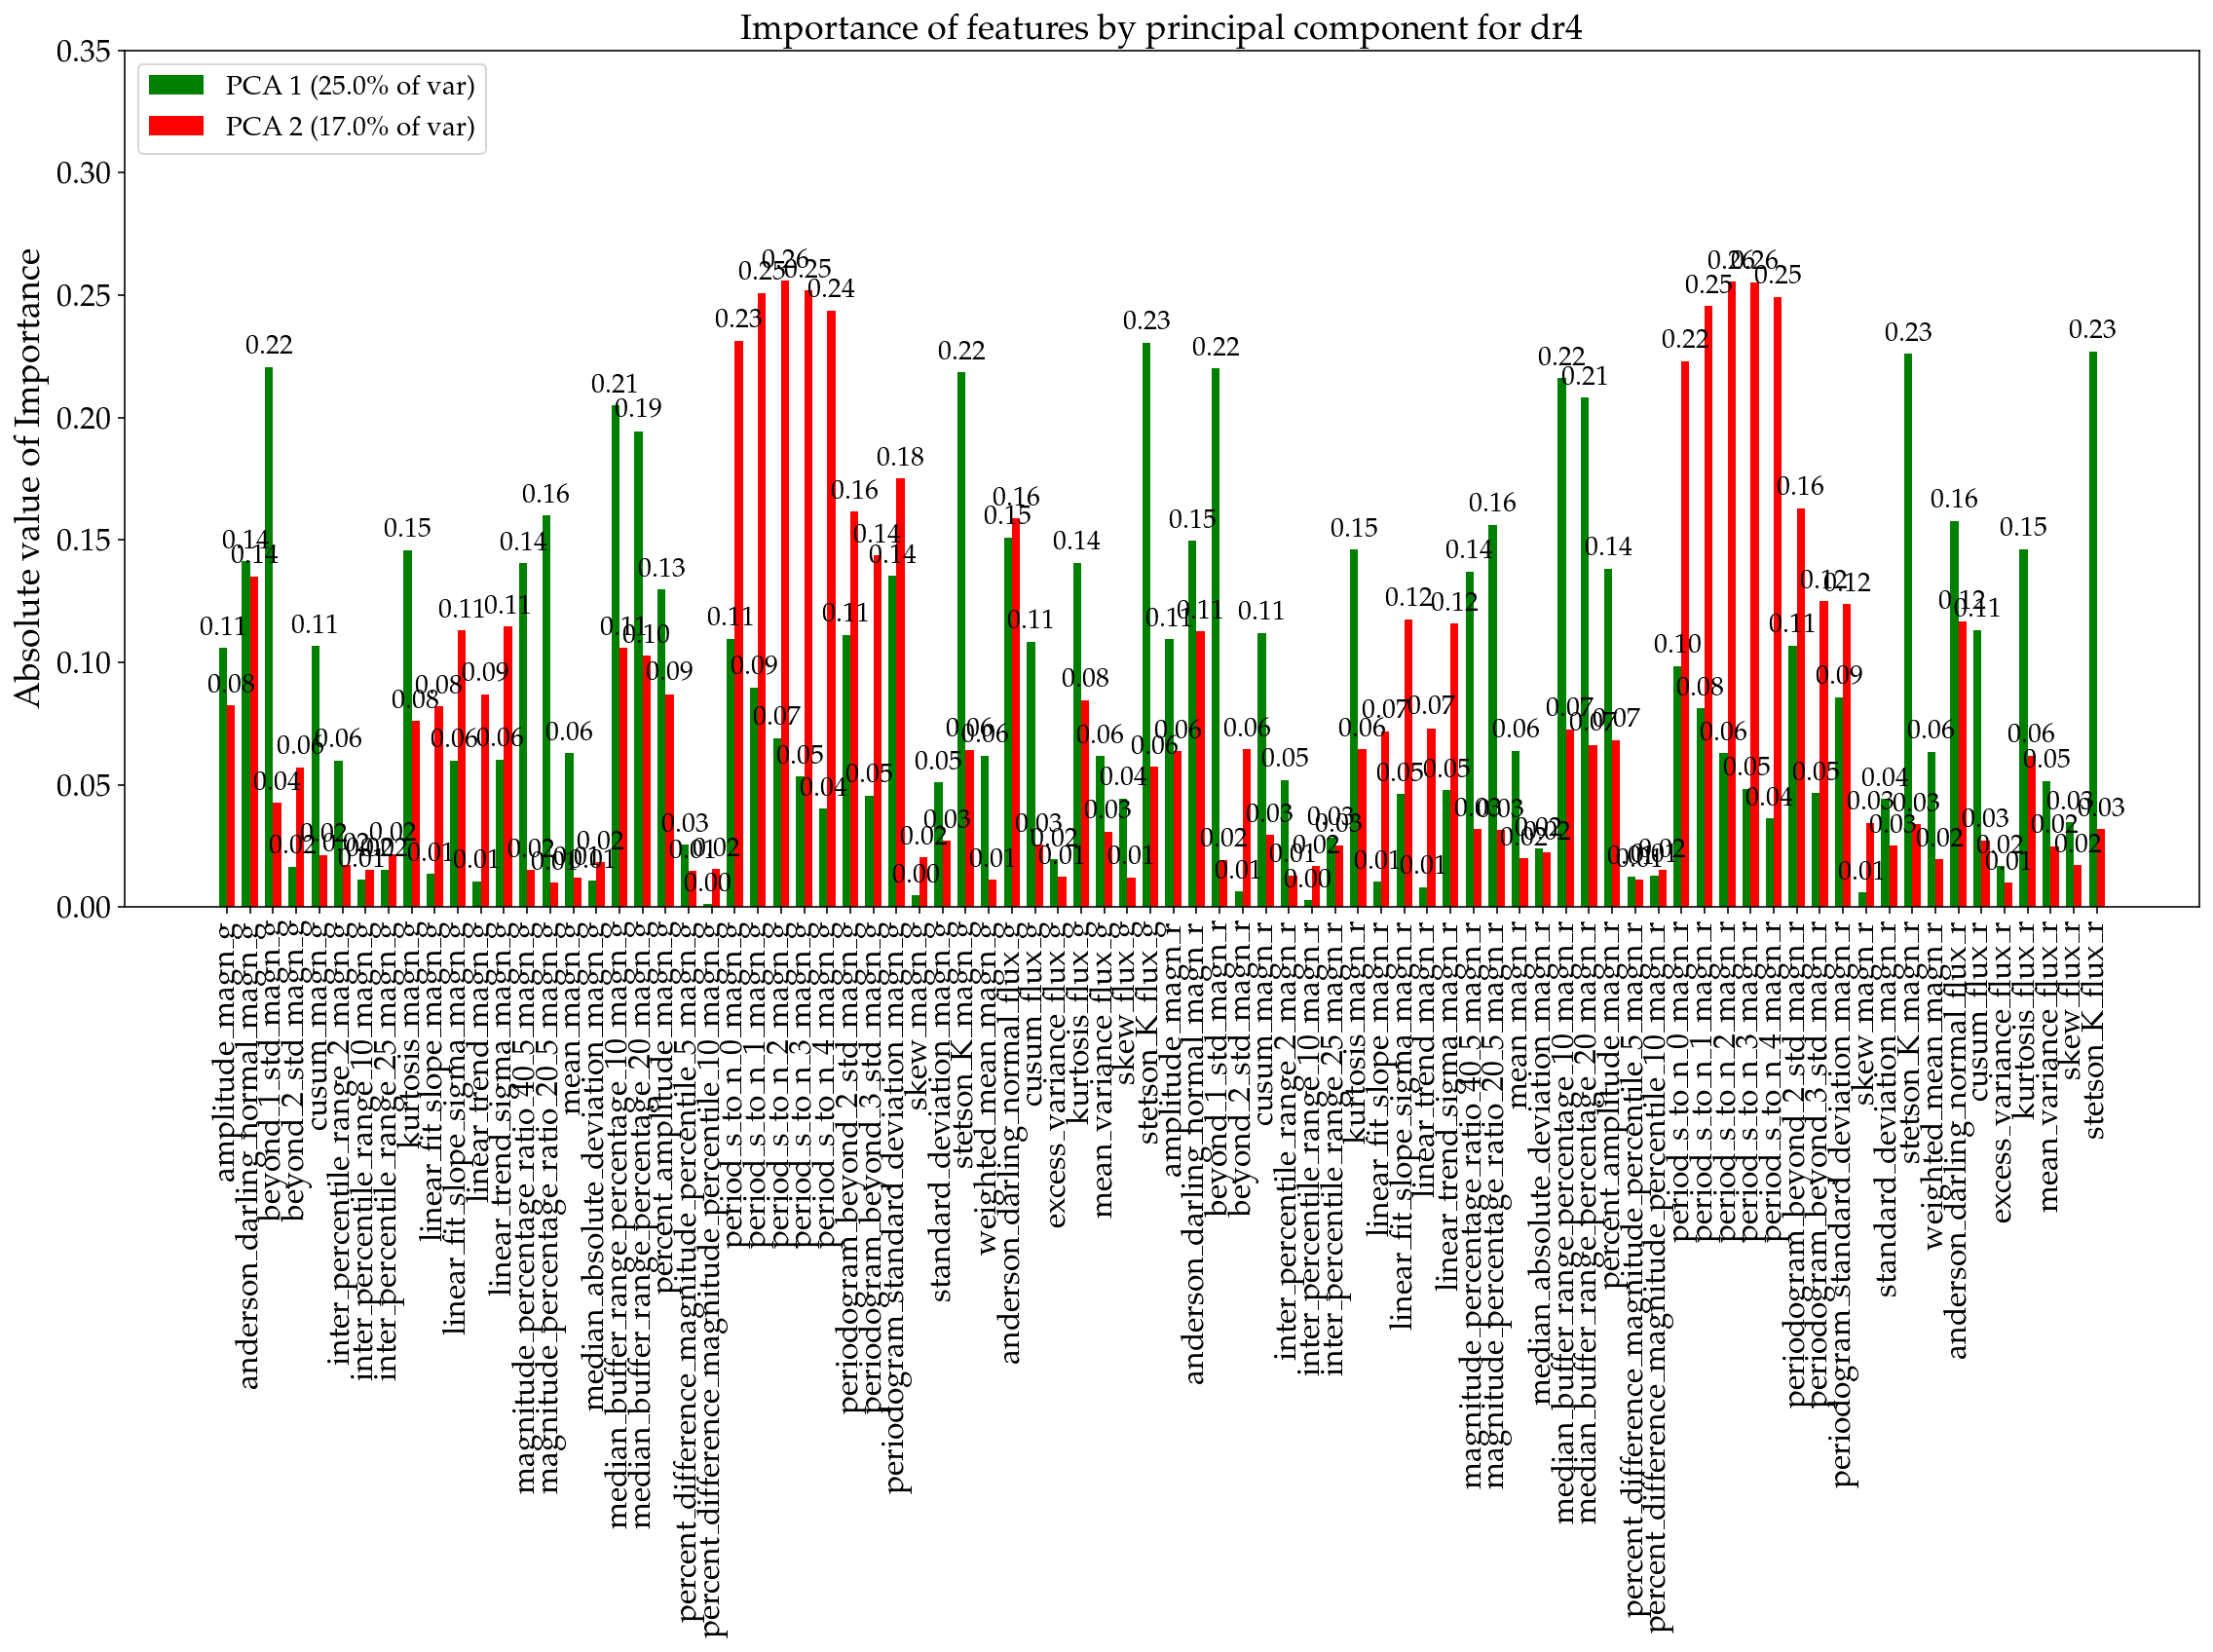

In [16]:
cols_latex_read = [r.replace('_', '\_') for r in dr4_df.columns.values]
labels = cols_latex_read
pca1 = abs(np.array(pca_comp.loc[['PCA1']])[0])
pca2 = abs(np.array(pca_comp.loc[['PCA2']])[0])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 12))
rects1 = ax.bar(x - width/2, pca1, width, label=f'PCA 1 ({round(pca_var_ratio[0], 2)*100}\% of var)', color='g')
rects2 = ax.bar(x + width/2, pca2, width, label=f'PCA 2 ({round(pca_var_ratio[1], 2)*100}\% of var)', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Absolute value of Importance')
ax.set_title('Importance of features by principal component for dr4')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylim(0, 0.35)
ax.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./figures/pca_feat_importance_barchart.png', dpi=300, bbox_inches='tight')

# Repeat kdtree experiment w/ first 15 PCs (of all 82 features) as input

In [17]:
pcs_X_fakes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sid,,,,,,,,,,,,,,,
6417979422,68.320153,-3.245662,18.148939,20.594229,-55.658226,-9.813647,-85.370797,-5.718446,13.445525,-3.217756,-12.829190,-0.353685,-0.696928,-13.125082,-9.607004
6439074373,93.032886,-3.357458,7.582035,36.872809,-14.574088,-6.120164,-16.225387,8.751485,8.868513,-12.300088,-8.485610,-5.820211,-2.674127,-15.886992,2.023145
9020928999,67.895401,-2.313617,15.033868,21.701524,-41.698952,-8.470361,-64.200816,-1.830232,10.747372,-4.444497,-11.551970,1.873989,0.448813,-14.082333,-4.391373
604029941,68.327337,-2.135591,13.458732,23.728215,-38.795608,-6.501566,-58.660546,-0.774375,12.961271,-3.922630,-8.716393,-3.367088,-3.059899,-8.251458,-4.877185
4229763628,80.824635,-3.555305,21.322197,26.570239,-53.860848,-10.805207,-75.066625,-0.726046,13.892452,-7.083509,-10.267617,-2.830083,-3.165062,-14.589188,-1.794690
6011793767,74.036038,-6.571253,18.709935,29.178633,-29.231547,-3.201588,-39.257492,2.347697,10.971331,-8.587772,-5.124227,-5.713363,-3.591917,-8.029214,-1.623052
6031286883,78.632268,-4.419617,17.132181,26.513687,-45.391577,-7.832855,-62.502065,0.199190,9.862187,-7.370195,-12.276823,-0.286546,0.164746,-10.143649,0.100789


In [18]:
pcs_X_real_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sid,,,,,,,,,,,,,,,
245101100000933,1.848374,-4.414711,-5.619392,5.259964,-0.999782,1.886475,2.325187,0.254462,-0.613783,-0.506667,-1.363090,-0.385465,0.583628,-0.451355,-1.989892
245101100009703,2.967064,-1.671175,-6.837336,3.595918,4.496346,0.035569,7.659103,0.350246,1.741859,-1.396336,0.549069,-1.516330,-0.009901,-4.071660,-2.128200
245101100010242,-0.108842,2.405274,-5.404212,0.148657,7.597082,0.413356,4.990347,0.843930,0.303865,-0.536131,-1.213950,-0.686024,-0.254137,-2.267715,-0.911700
245104200000799,7.365672,-5.579897,-5.080349,6.771768,0.701672,4.046233,2.639456,-1.075756,-2.851525,-0.917583,-1.643629,0.869823,0.196358,2.257424,-2.168233
245104200000939,30.154807,10.945096,-8.899698,12.321949,17.628879,-5.977942,18.174484,3.575954,2.797615,-3.233385,-3.716381,-4.543749,-3.161117,-4.353030,0.676911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597113100010642,3.946898,2.210205,-5.614794,0.057021,10.193946,-0.194100,7.076819,-0.936091,-2.616643,-0.237999,0.095689,-0.498582,0.966500,0.822282,0.739145
1597113100019088,0.413334,0.540810,-4.052422,-0.078619,4.553560,-0.578937,2.776992,0.468222,-0.763023,-0.079146,0.293624,-0.766300,0.061813,-0.741303,-0.832818
1597113100031221,-5.107737,-2.974856,-3.773431,1.666602,-0.358602,0.263081,0.706954,2.276441,0.666986,-0.080428,-1.447570,0.245481,-0.401141,-0.170202,1.629623


In [19]:
%%time

# Reorder SIMIDs to order I want
fakes_mining_sids = ['6439074373', '9020928999', '6011793767', '4229763628', '6417979422', '6031286883', '604029941']
fakes_mining_sids_int = list(map(int, fakes_mining_sids))

pcs_X_fakes_df = pcs_X_fakes_df.reindex(fakes_mining_sids_int)

# KDTREE
from scipy.spatial import cKDTree

X = np.vstack(pcs_X_fakes_df.values)
kdtree = cKDTree(np.vstack(pcs_X_real_df.values))
ktot=15
dist, ind = kdtree.query(X, k=ktot)

# Save PCA kdtree as pickle
pickle.dump(kdtree,open('./pca_15pcs_orig_kdtree.p','wb'))

CPU times: user 2.14 s, sys: 322 ms, total: 2.46 s
Wall time: 2.47 s


In [20]:
k_neighbor = 1   # change this number to find the NN you want

print(dist[:, k_neighbor])   # drop id; assumes sorted -> see args!
print(ind[:, k_neighbor])    # drop id

[25.45254466 25.38577287 16.09983184 23.36643229 18.36579948 28.68647044
 26.22749991]
[136560 268619 863422   8535 490190 697302 268619]


In [21]:
kdtree_results_df = pd.DataFrame()
kdtree_results_df['sid'] = pcs_X_fakes_df.index
kdtree_results_df = kdtree_results_df.set_index('sid')

kdtree_dist_df = kdtree_results_df.copy()

for knn in range(0,ktot):    
    dr4_match_oid, dr4_match_dist = [],[]
    for ix, dis in zip(ind[:, knn], dist[:, knn]):
        dr4_match_oid.append(dr4_df.iloc[ix].name)
        dr4_match_dist.append(dis)
    kdtree_results_df[f'knn={knn+1}_match_OID'] = dr4_match_oid
    kdtree_dist_df[f'knn={knn+1}_dist'] = dr4_match_dist

In [22]:
kdtree_results_df = kdtree_results_df.reindex(fakes_mining_sids_int)
kdtree_results_df.to_csv("./dataframes/pca_15pcs_orig_kdtree_results_df.csv.gzip", compression='gzip')
kdtree_results_df

,knn=1_match_OID,knn=2_match_OID,knn=3_match_OID,knn=4_match_OID,knn=5_match_OID,knn=6_match_OID,knn=7_match_OID,knn=8_match_OID,knn=9_match_OID,knn=10_match_OID,knn=11_match_OID,knn=12_match_OID,knn=13_match_OID,knn=14_match_OID,knn=15_match_OID
sid,,,,,,,,,,,,,,,
6439074373,678113200000807,594113100020019,643103100002286,856113200001251,588113200030350,381114200001632,822101100006663,594109100004829,690106200017515,595107300020866,781102200004629,828110100002089,764104300001305,643113100002265,643110400004177
9020928999,848110200002560,652113300001880,722106400006273,825102200017382,721110100001417,720109400001767,837114200005160,607113200001078,624115200003805,784104100005019,637108400009994,695111300073366,643110400004177,402113200000743,680109100003419
6011793767,643110400004177,828110100002089,624115200003805,692105400002212,637108400009994,690106200017515,784104100005019,765110300009733,825102200017382,781102200004629,856113200001251,837114200005160,720109400001767,838116300012131,588106200005275
4229763628,721110100001417,402113200000743,837114200005160,782101100008075,784104100005019,722106400006273,652113300001880,848110200002560,637108400009994,825102200017382,864111100006107,718105300001016,624115200003805,607113200001078,643110400004177
6417979422,402113200000743,721110100001417,782101100008075,722106400006273,864111100006107,652113300001880,848110200002560,723108100006520,683106100012907,718105300001016,763114100002462,607113200001078,845109400000132,793107200002055,763102300009331
6031286883,837114200005160,784104100005019,637108400009994,721110100001417,848110200002560,825102200017382,652113300001880,722106400006273,402113200000743,624115200003805,643110400004177,720109400001767,828110100002089,856113200001251,692105400002212
604029941,825102200017382,652113300001880,848110200002560,624115200003805,722106400006273,784104100005019,837114200005160,643110400004177,637108400009994,720109400001767,607113200001078,828110100002089,692105400002212,838116300012131,695111300073366


In [23]:
kdtree_dist_df = kdtree_dist_df.reindex(fakes_mining_sids_int)
kdtree_dist_df.to_csv("./dataframes/pca_15pcs_orig_kdtree_dist_df.csv.gzip", compression='gzip')
kdtree_dist_df

,knn=1_dist,knn=2_dist,knn=3_dist,knn=4_dist,knn=5_dist,knn=6_dist,knn=7_dist,knn=8_dist,knn=9_dist,knn=10_dist,knn=11_dist,knn=12_dist,knn=13_dist,knn=14_dist,knn=15_dist
sid,,,,,,,,,,,,,,,
6439074373,24.429770,25.452545,26.451934,26.813186,27.226520,28.221918,29.272029,29.946302,30.461401,31.641932,31.968419,34.344233,35.832074,35.890226,36.223807
9020928999,25.044516,25.385773,26.495736,27.494623,33.409650,33.538534,33.652002,34.303379,36.289219,36.308952,36.342655,37.177020,38.744021,38.949619,41.026972
6011793767,15.807713,16.099832,16.393326,21.300594,23.447474,26.506494,26.962513,28.956751,29.463922,29.587129,29.881052,30.782454,31.811754,32.797633,34.486656
4229763628,18.313979,23.366432,34.506378,38.880288,39.746041,39.875247,41.764629,41.897597,43.810381,45.872829,47.977279,50.989255,51.702808,53.679529,53.971201
6417979422,16.856635,18.365799,20.909998,30.958870,32.135056,35.060812,35.061549,35.419517,36.495230,37.659097,41.285842,46.760017,47.062184,47.740670,47.903885
6031286883,24.254100,28.686470,29.399628,32.694960,35.988620,36.095123,36.285669,37.499271,38.190981,38.327080,38.585706,41.407236,42.832492,43.767837,44.664639
604029941,22.823916,26.227500,27.578466,28.093905,29.763963,30.006047,30.128788,30.294345,30.917007,31.068289,33.945160,34.253861,35.447642,38.152875,38.298819


In [24]:
# Total real objects matched
print("Total real objects matched:", len(np.hstack(kdtree_results_df.values)))

# Of above, total UNIQUE real objects matched
print("Total real UNIQUE objects matched:", len(np.unique(np.hstack(kdtree_results_df.values))))
print(np.unique(np.hstack(kdtree_results_df.values)))

Total real objects matched: 105
Total real UNIQUE objects matched: 42
[381114200001632 402113200000743 588106200005275 588113200030350
 594109100004829 594113100020019 595107300020866 607113200001078
 624115200003805 637108400009994 643103100002286 643110400004177
 643113100002265 652113300001880 678113200000807 680109100003419
 683106100012907 690106200017515 692105400002212 695111300073366
 718105300001016 720109400001767 721110100001417 722106400006273
 723108100006520 763102300009331 763114100002462 764104300001305
 765110300009733 781102200004629 782101100008075 784104100005019
 793107200002055 822101100006663 825102200017382 828110100002089
 837114200005160 838116300012131 845109400000132 848110200002560
 856113200001251 864111100006107]


# Visually inspect matched OIDs

In [25]:
from IPython.display import display_markdown

print([display_markdown(f'https://ztf.snad.space/view/{oid}', raw=True) for oid in \
         np.unique(np.hstack(kdtree_results_df.values))])

https://ztf.snad.space/view/381114200001632

https://ztf.snad.space/view/402113200000743

https://ztf.snad.space/view/588106200005275

https://ztf.snad.space/view/588113200030350

https://ztf.snad.space/view/594109100004829

https://ztf.snad.space/view/594113100020019

https://ztf.snad.space/view/595107300020866

https://ztf.snad.space/view/607113200001078

https://ztf.snad.space/view/624115200003805

https://ztf.snad.space/view/637108400009994

https://ztf.snad.space/view/643103100002286

https://ztf.snad.space/view/643110400004177

https://ztf.snad.space/view/643113100002265

https://ztf.snad.space/view/652113300001880

https://ztf.snad.space/view/678113200000807

https://ztf.snad.space/view/680109100003419

https://ztf.snad.space/view/683106100012907

https://ztf.snad.space/view/690106200017515

https://ztf.snad.space/view/692105400002212

https://ztf.snad.space/view/695111300073366

https://ztf.snad.space/view/718105300001016

https://ztf.snad.space/view/720109400001767

https://ztf.snad.space/view/721110100001417

https://ztf.snad.space/view/722106400006273

https://ztf.snad.space/view/723108100006520

https://ztf.snad.space/view/763102300009331

https://ztf.snad.space/view/763114100002462

https://ztf.snad.space/view/764104300001305

https://ztf.snad.space/view/765110300009733

https://ztf.snad.space/view/781102200004629

https://ztf.snad.space/view/782101100008075

https://ztf.snad.space/view/784104100005019

https://ztf.snad.space/view/793107200002055

https://ztf.snad.space/view/822101100006663

https://ztf.snad.space/view/825102200017382

https://ztf.snad.space/view/828110100002089

https://ztf.snad.space/view/837114200005160

https://ztf.snad.space/view/838116300012131

https://ztf.snad.space/view/845109400000132

https://ztf.snad.space/view/848110200002560

https://ztf.snad.space/view/856113200001251

https://ztf.snad.space/view/864111100006107

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [26]:
from IPython.display import display_markdown

for knn in range(0,ktot):
    print(f"KNN {knn+1} \n")
    _ = [display_markdown(f'https://ztf.snad.space/view/{oid}', raw=True) for oid in \
         kdtree_results_df[f'knn={knn+1}_match_OID']]

KNN 1 



https://ztf.snad.space/view/678113200000807

https://ztf.snad.space/view/848110200002560

https://ztf.snad.space/view/643110400004177

https://ztf.snad.space/view/721110100001417

https://ztf.snad.space/view/402113200000743

https://ztf.snad.space/view/837114200005160

https://ztf.snad.space/view/825102200017382

KNN 2 



https://ztf.snad.space/view/594113100020019

https://ztf.snad.space/view/652113300001880

https://ztf.snad.space/view/828110100002089

https://ztf.snad.space/view/402113200000743

https://ztf.snad.space/view/721110100001417

https://ztf.snad.space/view/784104100005019

https://ztf.snad.space/view/652113300001880

KNN 3 



https://ztf.snad.space/view/643103100002286

https://ztf.snad.space/view/722106400006273

https://ztf.snad.space/view/624115200003805

https://ztf.snad.space/view/837114200005160

https://ztf.snad.space/view/782101100008075

https://ztf.snad.space/view/637108400009994

https://ztf.snad.space/view/848110200002560

KNN 4 



https://ztf.snad.space/view/856113200001251

https://ztf.snad.space/view/825102200017382

https://ztf.snad.space/view/692105400002212

https://ztf.snad.space/view/782101100008075

https://ztf.snad.space/view/722106400006273

https://ztf.snad.space/view/721110100001417

https://ztf.snad.space/view/624115200003805

KNN 5 



https://ztf.snad.space/view/588113200030350

https://ztf.snad.space/view/721110100001417

https://ztf.snad.space/view/637108400009994

https://ztf.snad.space/view/784104100005019

https://ztf.snad.space/view/864111100006107

https://ztf.snad.space/view/848110200002560

https://ztf.snad.space/view/722106400006273

KNN 6 



https://ztf.snad.space/view/381114200001632

https://ztf.snad.space/view/720109400001767

https://ztf.snad.space/view/690106200017515

https://ztf.snad.space/view/722106400006273

https://ztf.snad.space/view/652113300001880

https://ztf.snad.space/view/825102200017382

https://ztf.snad.space/view/784104100005019

KNN 7 



https://ztf.snad.space/view/822101100006663

https://ztf.snad.space/view/837114200005160

https://ztf.snad.space/view/784104100005019

https://ztf.snad.space/view/652113300001880

https://ztf.snad.space/view/848110200002560

https://ztf.snad.space/view/652113300001880

https://ztf.snad.space/view/837114200005160

KNN 8 



https://ztf.snad.space/view/594109100004829

https://ztf.snad.space/view/607113200001078

https://ztf.snad.space/view/765110300009733

https://ztf.snad.space/view/848110200002560

https://ztf.snad.space/view/723108100006520

https://ztf.snad.space/view/722106400006273

https://ztf.snad.space/view/643110400004177

KNN 9 



https://ztf.snad.space/view/690106200017515

https://ztf.snad.space/view/624115200003805

https://ztf.snad.space/view/825102200017382

https://ztf.snad.space/view/637108400009994

https://ztf.snad.space/view/683106100012907

https://ztf.snad.space/view/402113200000743

https://ztf.snad.space/view/637108400009994

KNN 10 



https://ztf.snad.space/view/595107300020866

https://ztf.snad.space/view/784104100005019

https://ztf.snad.space/view/781102200004629

https://ztf.snad.space/view/825102200017382

https://ztf.snad.space/view/718105300001016

https://ztf.snad.space/view/624115200003805

https://ztf.snad.space/view/720109400001767

KNN 11 



https://ztf.snad.space/view/781102200004629

https://ztf.snad.space/view/637108400009994

https://ztf.snad.space/view/856113200001251

https://ztf.snad.space/view/864111100006107

https://ztf.snad.space/view/763114100002462

https://ztf.snad.space/view/643110400004177

https://ztf.snad.space/view/607113200001078

KNN 12 



https://ztf.snad.space/view/828110100002089

https://ztf.snad.space/view/695111300073366

https://ztf.snad.space/view/837114200005160

https://ztf.snad.space/view/718105300001016

https://ztf.snad.space/view/607113200001078

https://ztf.snad.space/view/720109400001767

https://ztf.snad.space/view/828110100002089

KNN 13 



https://ztf.snad.space/view/764104300001305

https://ztf.snad.space/view/643110400004177

https://ztf.snad.space/view/720109400001767

https://ztf.snad.space/view/624115200003805

https://ztf.snad.space/view/845109400000132

https://ztf.snad.space/view/828110100002089

https://ztf.snad.space/view/692105400002212

KNN 14 



https://ztf.snad.space/view/643113100002265

https://ztf.snad.space/view/402113200000743

https://ztf.snad.space/view/838116300012131

https://ztf.snad.space/view/607113200001078

https://ztf.snad.space/view/793107200002055

https://ztf.snad.space/view/856113200001251

https://ztf.snad.space/view/838116300012131

KNN 15 



https://ztf.snad.space/view/643110400004177

https://ztf.snad.space/view/680109100003419

https://ztf.snad.space/view/588106200005275

https://ztf.snad.space/view/643110400004177

https://ztf.snad.space/view/763102300009331

https://ztf.snad.space/view/692105400002212

https://ztf.snad.space/view/695111300073366